# Check Dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
from space_agent import params

In [11]:
os.environ['IMAGES_FOLDER']
#print(os.environ)
print(params.DIR_PATH)

/Users/sarahakamiezan/code/NMenacho/To-infinity-and-beyond/notebooks


In [44]:
image_dir = os.environ['IMAGES_FOLDER']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []
y_list_rs = []
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    cat_rs = image_info[4]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)
    y_list_rs.append(cat_rs)

print(y_list_rs)
X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)
y_data_rs = np.array(y_list_rs)
print(y_data_rs.shape)


['1.010923', '1.209123', '0.6665187', '2.225737', '0.0001422011', '-8.090883E-05', '2.767038', '0.2391574', '0.6223869', '0.2505086', '0.2219528', '0.1724996', '0', '0.5636192', '0.03524341', '0.4720401', '0.7199418', '0.3576956', '0.001169006', '0.1331261', '0.1360405', '0.04427182', '1.733559', '0.08380156', '-0.0001855833', '0.08159095', '0.4523347', '0.5262727', '0.6161788', '0.674728', '0.3873063', '0.3963717', '0.781274', '-9.226981E-05', '0.04986177', '0.4965568', '0.5599355', '1.706481', '8.742255E-06', '-7.661748E-05', '-0.0001649231', '1.370666', '0.2190886', '0.08925132', '0.7241014', '1.72743', '0.1769563', '-0.00119028', '1.134688', '2.376138', '0.3044364', '2.68521', '0.08155313', '0.5292884', '0.120884', '0.6665569', '0.1655436', '-4.71419E-05', '0.5361146', '0.2827351', '-0.0003634203', '0.4114533', '1.955473', '0.6048405', '0.4915748', '-0.0006677322', '0.321112', '-0.0007215439', '1.031966', '0.424661', '0.0004171139', '0.03419822', '-0.0001004827', '-0.0002666793', '

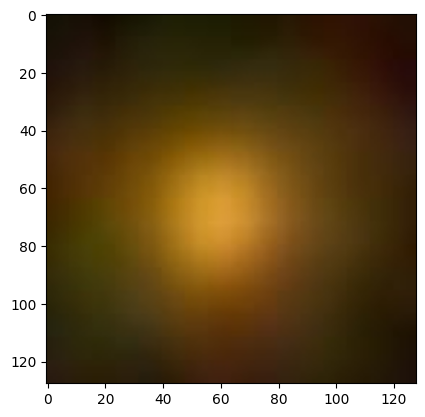

In [13]:
plt.imshow(X_data[3]) #/ use this tomorrow

In [14]:
#y.value_counts()/len(y)

In [15]:
import pandas as pd
y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat


0       0
1       1
2       1
3       1
4       1
       ..
2652    1
2653    0
2654    0
2655    0
2656    0
Length: 2657, dtype: int64

In [16]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data
y = y_data_cat

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,stratify=y)


In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2125, 128, 128, 3), (532, 128, 128, 3), (2125,), (532,))

# 1. The Convolutional Neural Network (test1)

### A. Architecture and compilation of a CNN

In [18]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/sarahakamiezan/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [24]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.3,
          callbacks=[es])


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8931 - loss: 0.3050 - mae: 0.2113 - mse: 0.0865 - precision: 0.8818 - recall: 0.9695 - val_accuracy: 0.8401 - val_loss: 0.4744 - val_mae: 0.2475 - val_mse: 0.1341 - val_precision: 0.8561 - val_recall: 0.9022
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9167 - loss: 0.2649 - mae: 0.1721 - mse: 0.0710 - precision: 0.9114 - recall: 0.9725 - val_accuracy: 0.8292 - val_loss: 0.5535 - val_mae: 0.2351 - val_mse: 0.1337 - val_precision: 0.8769 - val_recall: 0.8533
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8791 - loss: 0.3786 - mae: 0.1879 - mse: 0.0945 - precision: 0.8744 - recall: 0.9421 - val_accuracy: 0.8182 - val_loss: 0.5205 - val_mae: 0.2512 - val_mse: 0.1345 - val_precision: 0.8415 - val_recall: 0.8826
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8629 - loss: 0.4377 - mae: 0.2108 - mse: 0.1034 - precision: 0.8539 - recall: 0.9595 - val_accuracy: 0.8683 - va

### C. Evaluate model's performance

In [25]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8363 - loss: 0.5015 - mae: 0.2132 - mse: 0.1259 - precision: 0.8420 - recall: 0.9256


[0.5418000817298889,
 0.8327067494392395,
 0.9140400886535645,
 0.8439153432846069,
 0.21385572850704193,
 0.13199585676193237]

### D. Plot loss and accuracy

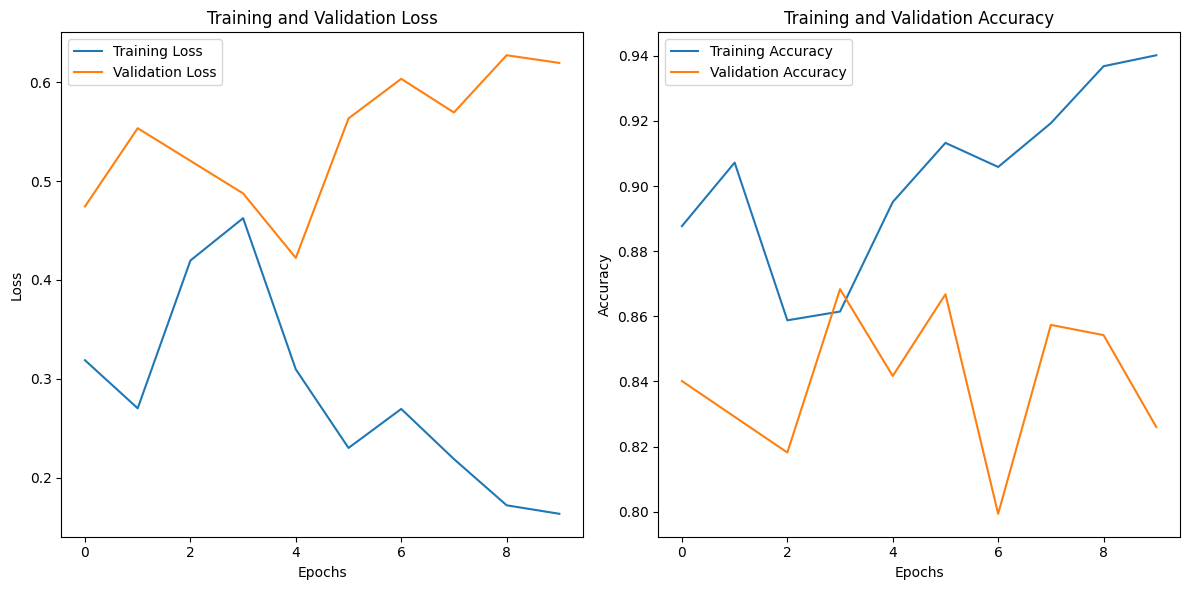

In [26]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 2. The Convolutional Neural Network (other tests)

In [27]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [28]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9286 - loss: 0.2881 - mae: 0.1158 - mse: 0.0588 - precision: 0.9320 - recall: 0.9603 - val_accuracy: 0.8871 - val_loss: 0.3256 - val_mae: 0.1389 - val_mse: 0.0845 - val_precision: 0.8780 - val_recall: 0.9557
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9290 - loss: 0.2372 - mae: 0.1170 - mse: 0.0595 - precision: 0.9307 - recall: 0.9606 - val_accuracy: 0.9412 - val_loss: 0.1834 - val_mae: 0.1065 - val_mse: 0.0469 - val_precision: 0.9659 - val_recall: 0.9410
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9475 - loss: 0.1734 - mae: 0.0900 - mse: 0.0425 - precision: 0.9521 - recall: 0.9709 - val_accuracy: 0.9082 - val_loss: 0.2525 - val_mae: 0.1403 - val_mse: 0.0722 - val_precision: 0.9173 - val_recall: 0.9410
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9544 - loss: 0.1935 - mae: 0.0861 - mse: 0.0390 - precision: 0.9558 - recall: 0.9767

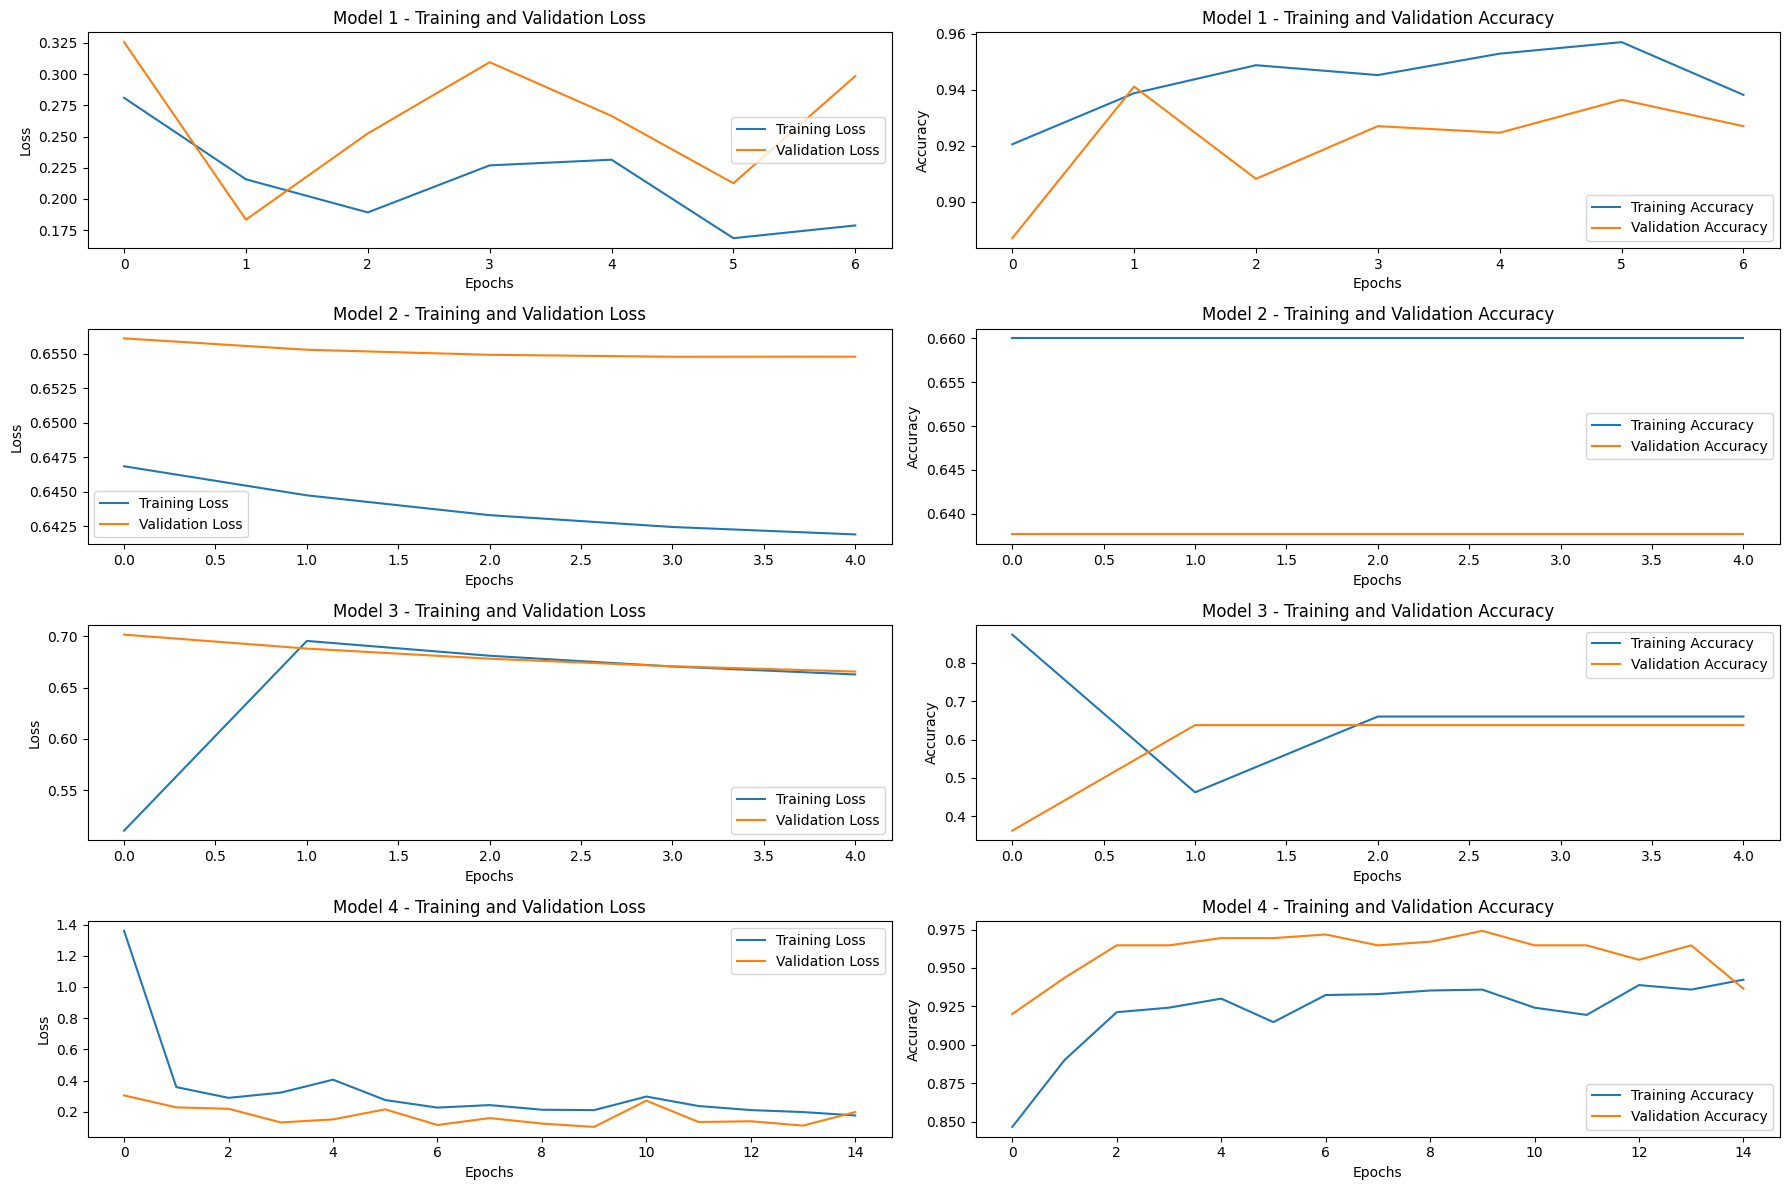

In [32]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [33]:
y_train.value_counts()/len(y_train)

1    0.655529
0    0.344471
Name: count, dtype: float64

In [34]:
y_pred = model_3.predict(X_test)
y_pred

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],
       [0.6403567],


In [35]:
y_pred_m1 = model_1.predict(X_test)
y_pred_m1

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[9.9999636e-01],
       [8.8326889e-01],
       [8.8326889e-01],
       [9.4994736e-01],
       [8.8326889e-01],
       [8.8326889e-01],
       [9.9812078e-01],
       [6.9368947e-01],
       [1.5862619e-03],
       [9.9227482e-01],
       [9.9968863e-01],
       [8.8326889e-01],
       [8.7141585e-01],
       [8.8326889e-01],
       [8.8297641e-01],
       [6.5654117e-01],
       [2.5699157e-01],
       [8.4800756e-01],
       [4.7619131e-01],
       [3.5706103e-01],
       [8.8326889e-01],
       [2.4018265e-09],
       [7.8057992e-01],
       [5.4728073e-01],
       [8.8326889e-01],
       [6.1983336e-04],
       [6.2844878e-01],
       [8.8326889e-01],
       [8.9216651e-03],
       [9.9996203e-01],
       [2.6418491e-05],
       [2.5071296e-01],
       [8.8326889e-01],
       [5.8671153e-01],
       [9.9414080e-01],
       [9.6818745e-01],
       [1.9802896e-03],
       [7.5292617e-01],
       [8.8326889e-01],
       [9.1906440e-01],
       [8.8326889e-01],
       [9.999979

In [39]:
y_train

968     1
1354    1
185     0
1517    1
912     0
       ..
2134    1
1250    1
1869    1
1898    1
1396    1
Length: 2125, dtype: int64

## Redshift tests

In [68]:
model_rs = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

/Users/sarahakamiezan/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model_rs.compile(optimizer='adam',
              loss='mse',
              metrics=['mae','mse'])


In [73]:

# Split the dataset
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_data,y_data_rs,
                                                    test_size=0.3,
                                                    random_state=42)

In [74]:
X_data.shape, y_rs.shape

((4324, 128, 128, 3), (4324,))

In [87]:
es = EarlyStopping(patience=5)
history_rs = model_rs.fit(X_train_rs,y_train_rs.astype(float),
                        batch_size=32,
                        epochs=100,
                        validation_split=0.3,
                        callbacks=[es])

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.5857 - mae: 0.5180 - mse: 0.5857 - val_loss: 0.5776 - val_mae: 0.5142 - val_mse: 0.5776
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.6161 - mae: 0.5283 - mse: 0.6161 - val_loss: 0.5776 - val_mae: 0.5143 - val_mse: 0.5776
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.6530 - mae: 0.5270 - mse: 0.6530 - val_loss: 0.5776 - val_mae: 0.5141 - val_mse: 0.5776
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.5478 - mae: 0.5074 - mse: 0.5478 - val_loss: 0.5776 - val_mae: 0.5145 - val_mse: 0.5776
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.5545 - mae: 0.5119 - mse: 0.5545 - val_loss: 0.5776 - val_mae: 0.5143 - val_mse: 0.5776
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.5560 - mae: 0.5150 - mse: 0.5560 - val_loss: 0.5776 - val_mae: 0.5135 - val_mse: 0.5776
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.6128 - mae: 0.5222 - mse: 0.612

In [80]:
y_train_rs.astype(float)

array([ 6.245732e-01,  5.149764e-04,  1.585743e+00, ...,  2.853039e+00,
       -8.729906e-05,  9.342973e-02])

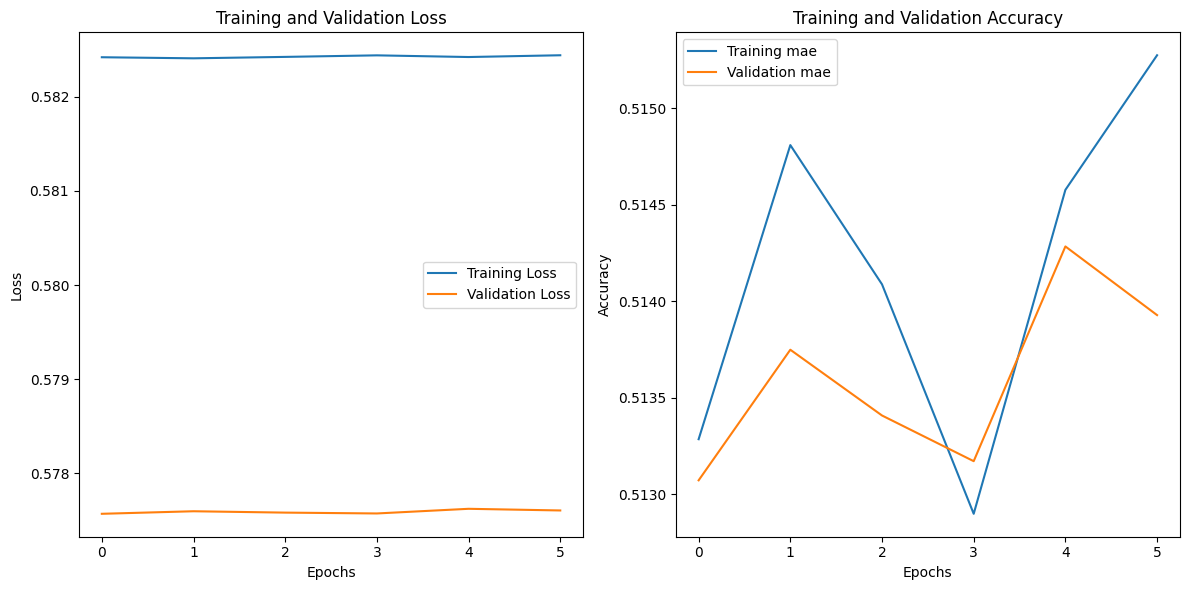

In [86]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_rs.history['loss'], label='Training Loss')
plt.plot(history_rs.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rs.history['mae'], label='Training mae')
plt.plot(history_rs.history['val_mae'], label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()